## A demonstration of overfitting
## with a simple polynomial fit
## (not a neural network!!)

Total dataset has  4177  data points
Will use a random sample of only  10  data points


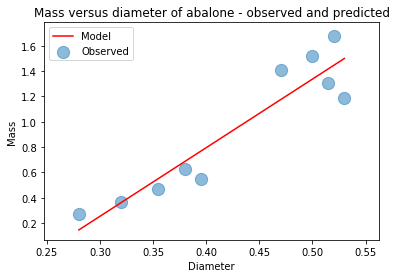

Fitted model is  1 st order
y = 
 
5.411 x - 1.368


In [27]:
# import libraries that are required
import numpy as np
import sys
import matplotlib.pyplot as plt

# Load data from file into N by 2 numpy array
filename = "abalone.data.txt"
X = np.loadtxt( filename, delimiter=',', usecols=(2,4) )

# Put first column into N by 1 array called diameter
# and second column into N by 1 array called mass_observed
diameter = X[:,0]
mass_observed = X[:,1]

# I don't want to use all the data so I use the numpy function
# called random.choice to generate 10 random indices out of a total
# of diameter.size indices. Then I create smaller sample vectors that
# are just 10 in size from the complete dataset
np.random.seed(10)
print('Total dataset has ',diameter.size,' data points')
sample_size = 10
print('Will use a random sample of only ',sample_size,' data points')
sample_indices = np.random.choice(diameter.size,sample_size)
diameter_sample = diameter[sample_indices]
mass_observed_sample = mass_observed[sample_indices]

# Set the degree of the polynomial you wish for your model
# degree_of_polynomial_to_fit = 1 is a linear model y = a x + b
# degree_of_polynomial_to_fit = 2 is a quadratic model y = a x^2 + b x + c
# degree_of_polynomial_to_fit = 3 is a cubic model y = a x^3 + b x^2 + c x + d
# etc.
degree_of_polynomial_to_fit = 1

# Fit the polynomial model using the numpy polyfit function
# It returns the coefficients of an n-th degree polynomial
# that fits your data. A very useful numpy function to know!!
coefficients = np.polyfit(diameter_sample, mass_observed_sample, degree_of_polynomial_to_fit)

# I want to plot the model as a line plot so I generate a large 
# set of ordered diameter values for which I can find corresponding
# model mass predictions using the polynomial function I just fitted
diameter_sample_for_plot = np.linspace(diameter_sample.min(),diameter_sample.max(),100)

# Use the fitted model coefficients to create the model function
model_for_mass = np.poly1d(coefficients)

# Make predictions for mass using the model function and the diameter values I generated earlier
mass_prediction = model_for_mass(diameter_sample_for_plot)

# Now I can do the plots
plt.scatter(diameter_sample,mass_observed_sample, marker = 'o', s=150, alpha = 0.5,label='Observed')
plt.plot(diameter_sample_for_plot,mass_prediction,color='red',label='Model')

#plt.text(0.05,2.2,str(loss))
plt.xlabel('Diameter')
plt.ylabel('Mass')
plt.title('Mass versus diameter of abalone - observed and predicted')
plt.legend(loc='best')

#plt.savefig("abalone.png")
plt.show()

if degree_of_polynomial_to_fit == 1:
    s='st order'
elif degree_of_polynomial_to_fit == 2:
    s='nd order'
else:
    s='th order'
    
print('Fitted model is ',degree_of_polynomial_to_fit,s)
print('y = ')
print(model_for_mass)